In [69]:
import sys
import os
import numpy as np
import pandas as pd

# Путь к директории, в которой находится этот файл
# Чтобы можно импортировать папки с кодом из директории выше
# например from censure import Censor
current_directory = os.path.dirname(os.path.abspath(''))
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(current_directory)

In [70]:
from scripts.profanity_check import profanity_processing
from scripts.embedding_model import universal_sentence_encoder
from scripts.clasterer import Clasterer

In [71]:
import pandas as pd
# csv_file = 'Answers.csv'
# data = pd.read_csv(csv_file).iloc[1:,0].reset_index(drop=True).to_list()
csv_file = '../data/motivations.csv'
with open(csv_file, 'r', encoding='utf-8') as file:
    data = file.readlines()
    data = [line.strip().replace('"', '').replace("'", '') for line in lines]

In [73]:
import sys
import os
import numpy as np
import pandas as pd

# Путь к директории, в которой находится этот файл
# Чтобы можно импортировать папки с кодом из директории выше
# например from censure import Censor
current_directory = os.path.dirname(os.path.abspath(''))
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(current_directory)

from scripts.embedding_model import RuBertEmbedder
rb = RuBertEmbedder()
embeddings = rb.transform(data)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [74]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
svd = PCA(n_components=2)
embeddings_reduced = svd.fit_transform(embeddings)

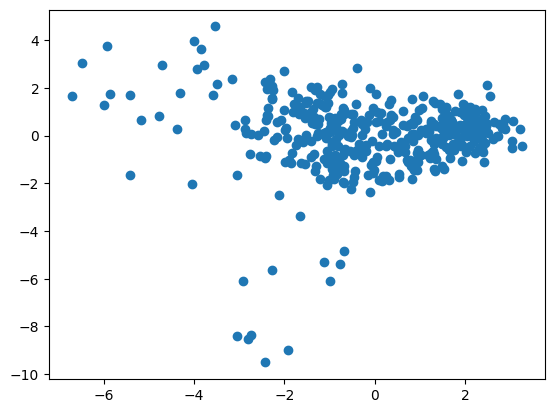

In [75]:
plt.scatter(embeddings_reduced.T[0], embeddings_reduced.T[1])

In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(embeddings_reduced)



KMeans(n_clusters=3)

[1.1592585 0.3116405] [2.1777742 0.9994623] 75.31186
[-2.028801  -2.6728406] [4.171637  2.2364895] -3.5101008
[-4.5819583  4.115601 ] [3.6072636 2.1666477] 65.19146


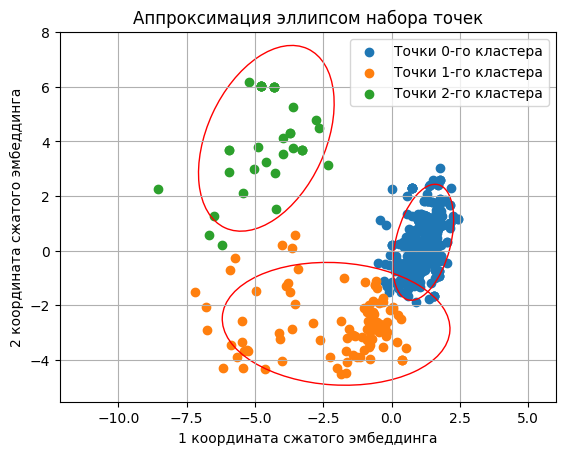

In [41]:
fig, ax = plt.subplots()
for i in range(len(km.cluster_centers_)):
    # Преобразование входных данных в numpy массив
    labels = km.labels_
    points = np.array(embeddings_reduced[km.labels_ == i])
    # Находим центр массива точек
    center = np.mean(points, axis=0)
    # Выполняем анализ главных компонент
    pca = PCA(n_components=2)
    pca.fit(points)
    
    # Достаем собственные вектора и собственные значения
    eigenvectors = pca.components_
    eigenvalues = pca.explained_variance_
    
    # Масштабируем собственные значения, чтобы они соответствовали заданному уровню охвата (например, 2 стандартных отклонения)
    scale_factor = np.sqrt(eigenvalues) * 2
    
    # Построение эллипса
    ellipse = plt.matplotlib.patches.Ellipse(
        xy=center,
        width=scale_factor[0] * 2,
        height=scale_factor[1] * 2,
        angle=np.degrees(np.arctan2(*eigenvectors[0][::-1])),
        edgecolor='r',
        facecolor='none',
    )
    
    # Создаем график
    print(center, scale_factor, np.degrees(np.arctan2(*eigenvectors[0][::-1])))
    ax.scatter(embeddings_reduced[km.labels_ == i][:, 0], embeddings_reduced[km.labels_ == i][:, 1], label='Точки {}-го кластера'.format(i),)
    ax.add_patch(ellipse)
    ax.set_xlabel('1 координата сжатого эмбеддинга')
    ax.set_ylabel('2 координата сжатого эмбеддинга')
    ax.set_title('Аппроксимация эллипсом набора точек')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')

In [46]:
import os
os.listdir('../data')

['Answers.csv', 'motivations.csv']

In [2]:
with open('../data/motivations.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    lines = [line.strip().replace('"', '').replace("'", '') for line in lines]

In [5]:

from collections import Counter
words = ["apple", "banana", "apple", "orange", "banana", "kiwi", "orange", "apple"]

# Подсчет количества слов
word_count = Counter(words)

# Форматируем вывод
result = [(word, count) for word, count in word_count.items()]
result

[('apple', 3), ('banana', 2), ('orange', 2), ('kiwi', 1)]